In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('Social_Network_Ads (1).csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
X=data.iloc[:,2:4].values
y=data.iloc[:,-1:].values


In [5]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [6]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

<Axes: xlabel='Purchased', ylabel='count'>

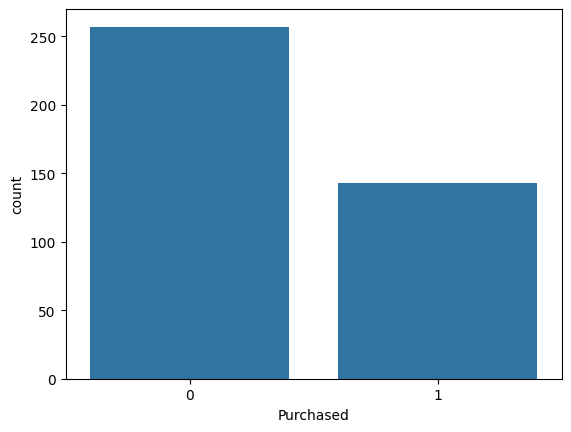

In [7]:
sns.countplot(x=data['Purchased'])

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
x_train.shape

(320, 2)

In [10]:
y_train.shape

(320, 1)

In [11]:
x_test.shape

(80, 2)

In [12]:
y_test.shape

(80, 1)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=2)
classifier.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [23]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

[Text(0.5, 0.8333333333333334, 'x[0] <= 0.611\nentropy = 0.957\nsamples = 320\nvalue = [199, 121]'),
 Text(0.25, 0.5, 'x[1] <= 0.596\nentropy = 0.708\nsamples = 228\nvalue = [184, 44]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.256\nsamples = 186\nvalue = [178, 8]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.592\nsamples = 42\nvalue = [6, 36]'),
 Text(0.75, 0.5, 'x[1] <= -0.824\nentropy = 0.642\nsamples = 92\nvalue = [15, 77]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.196\nsamples = 33\nvalue = [1, 32]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.791\nsamples = 59\nvalue = [14, 45]')]

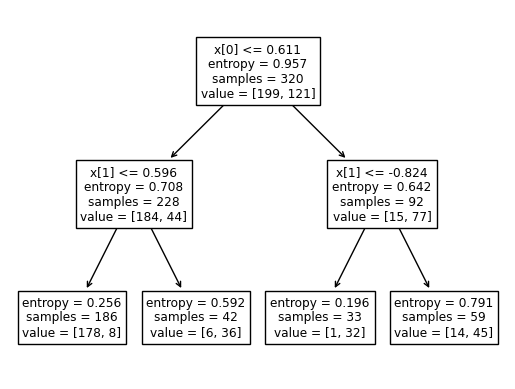

In [24]:
from sklearn import tree
tree.plot_tree(classifier)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[55  3]
 [ 1 21]]
0.95
0.9130434782608695


<Axes: >

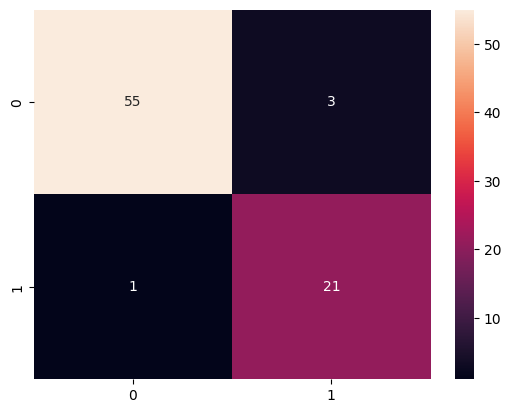

In [26]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [34]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(max_depth=2)
regressor.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=2)

In [35]:
y_pred=regressor.predict(x_test)
y_pred

array([0.04301075, 0.04301075, 0.04301075, 0.04301075, 0.04301075,
       0.04301075, 0.04301075, 0.85714286, 0.04301075, 0.76271186,
       0.04301075, 0.04301075, 0.04301075, 0.04301075, 0.04301075,
       0.85714286, 0.04301075, 0.04301075, 0.76271186, 0.04301075,
       0.04301075, 0.76271186, 0.04301075, 0.76271186, 0.04301075,
       0.76271186, 0.04301075, 0.04301075, 0.04301075, 0.04301075,
       0.04301075, 0.04301075, 0.76271186, 0.04301075, 0.04301075,
       0.04301075, 0.04301075, 0.04301075, 0.04301075, 0.96969697,
       0.04301075, 0.04301075, 0.04301075, 0.04301075, 0.85714286,
       0.04301075, 0.04301075, 0.76271186, 0.04301075, 0.76271186,
       0.76271186, 0.04301075, 0.04301075, 0.85714286, 0.76271186,
       0.96969697, 0.04301075, 0.04301075, 0.96969697, 0.04301075,
       0.04301075, 0.76271186, 0.04301075, 0.85714286, 0.04301075,
       0.76271186, 0.04301075, 0.04301075, 0.04301075, 0.04301075,
       0.85714286, 0.04301075, 0.04301075, 0.96969697, 0.04301

In [36]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,y_pred))

0.7598380337265097


In [37]:
print(mean_squared_error(y_test,y_pred))

0.04788229202577714


[Text(0.5, 0.8333333333333334, 'x[0] <= 0.611\nsquared_error = 0.235\nsamples = 320\nvalue = 0.378'),
 Text(0.25, 0.5, 'x[1] <= 0.596\nsquared_error = 0.156\nsamples = 228\nvalue = 0.193'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.041\nsamples = 186\nvalue = 0.043'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.122\nsamples = 42\nvalue = 0.857'),
 Text(0.75, 0.5, 'x[1] <= -0.824\nsquared_error = 0.136\nsamples = 92\nvalue = 0.837'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.029\nsamples = 33\nvalue = 0.97'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.181\nsamples = 59\nvalue = 0.763')]

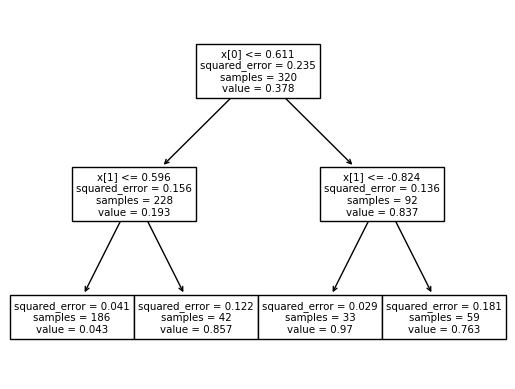

In [38]:
from sklearn import tree
tree.plot_tree(regressor)